1. Perform correlation analysis on PM2.5 data obtained from the provinces of Kanchanaburi, Rayong and Narathiwat. Display the correlation matrix using plasma colormap.

In [1]:
import pandas as pd
%matplotlib inline
import pandas.util.testing as tm
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
kanchanaburi = pd.read_csv('Documents/kanchanaburi_pm25.csv', delimiter=',',usecols = ['PM2.5'])
rayong = pd.read_csv('Documents/rayongmaptaphut_pm25.csv', delimiter=',',usecols = ['PM2.5'])
narathiwat = pd.read_csv('Documents/narathiwat_pm25.csv', delimiter=',',usecols = ['PM2.5'])

In [52]:
kanchanaburi.shape

(23808, 1)

In [53]:
rayong.shape

(23812, 1)

In [54]:
narathiwat.shape

(23815, 1)

In [55]:
cities = pd.concat([kanchanaburi, rayong, narathiwat], axis = 1 ,ignore_index = True)
cities

,0,1,2
0,65.2,40.6,62.9
1,65.2,40.6,62.9
2,64.9,40.6,55.5
3,64.9,40.6,55.5
4,38.4,38.7,47.9
...,...,...,...
23810,NaN,29.0,15.0
23811,NaN,22.0,12.0
23812,NaN,NaN,12.0
23813,NaN,NaN,20.0


In [56]:
cities.columns= ['kanchanaburi','rayong','narathiwat']
cities.head()

,kanchanaburi,rayong,narathiwat
0,65.2,40.6,62.9
1,65.2,40.6,62.9
2,64.9,40.6,55.5
3,64.9,40.6,55.5
4,38.4,38.7,47.9


In [57]:
cities.isnull().sum()

kanchanaburi    7
rayong          3
narathiwat      0
dtype: int64

In [58]:
cities_new = cities.copy()

In [59]:
cities_new.fillna(cities.mean(),inplace = True)
cities_new.isnull().sum()

kanchanaburi    0
rayong          0
narathiwat      0
dtype: int64

In [60]:
cities_new.corr()

,kanchanaburi,rayong,narathiwat
kanchanaburi,1.000000,0.665902,0.631453
rayong,0.665902,1.000000,0.545178
narathiwat,0.631453,0.545178,1.000000


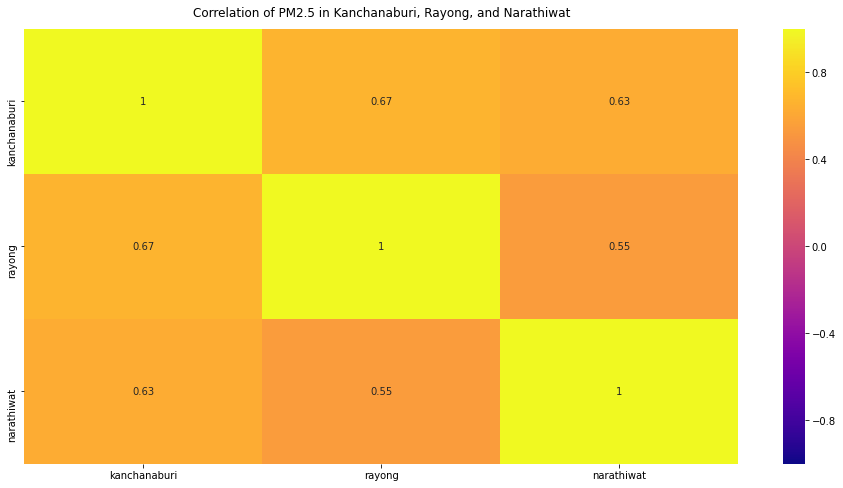

In [61]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(cities_new.corr(), vmin = -1 , vmax =1, annot=True, cmap="plasma")
heatmap.set_title('Correlation of PM2.5 in Kanchanaburi, Rayong, and Narathiwat', fontdict={'fontsize':12}, pad = 12);

This means that when PM2.5 in Kanchanaburi increase PM2.5 in Rayong and Narathiwat also increase
as same as PM2.5 in Rayong increas, PM2.5 in Narathiwat and Kanchcnaburi also increase, and the same as
PM2.5 in Narathiwat increase, Rayong and Kanchanburi also increase.



2. Perform year-wise trend of line plot for all the data


In [62]:
kanchanaburi = pd.read_csv('Documents/kanchanaburi_pm25.csv')
rayong = pd.read_csv('Documents/rayongmaptaphut_pm25.csv')
narathiwat = pd.read_csv('Documents/narathiwat_pm25.csv')

In [63]:
city = pd.concat([kanchanaburi,rayong,narathiwat], axis =0 , ignore_index = True)
#concat all data together

In [64]:
city.rename(columns={'UTC Hour':'Hour'}, inplace=True)
city.head()
#change column name

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0


In [65]:
city['datetime'] = pd.to_datetime(city[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
city.index = city['datetime']
city.Hour = city.index.hour 
city.head()
#reset UTC hour to Bangkok time and create datetime then set as index

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,65.2,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,65.2,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,64.9,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,64.9,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,38.4,1,0,2016-03-03 19:00:00


In [66]:
city.isnull().sum()
#check if there is some null value

Year             0
Month            0
Day              0
Hour             0
PM2.5            0
PM10_mask        0
Retrospective    0
datetime         0
dtype: int64

In [67]:
city.drop(columns={'datetime','PM10_mask','Retrospective'},inplace = True)
#drop unneccessary columns

In [68]:
city.shape

(71435, 5)

<AxesSubplot:title={'center':'Maximum of PM2.5 of Kanchanburi, Rayong, and Narathiwat yearly'}, xlabel='datetime'>

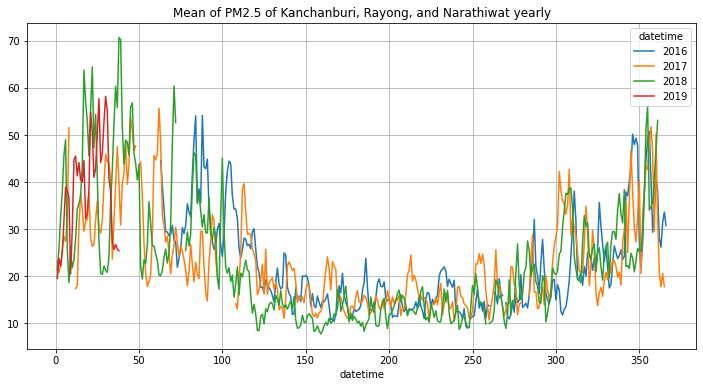

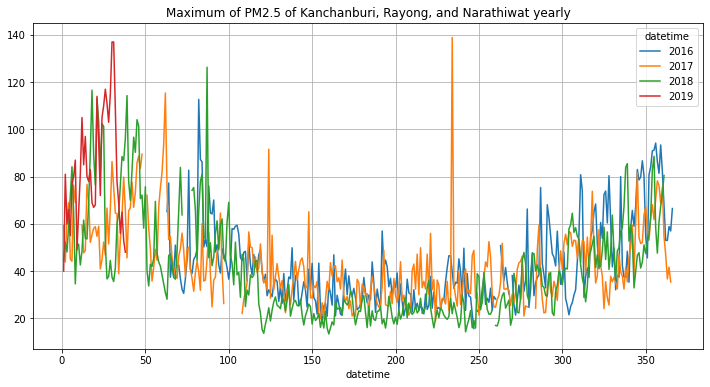

In [69]:
mean_year = pd.pivot_table(city, index = city.index.dayofyear,columns = city.index.year, values = 'PM2.5')

mean_year.plot(title='Mean of PM2.5 of Kanchanburi, Rayong, and Narathiwat yearly', figsize = (12,6), grid =True)

max_year = pd.pivot_table(city, index = city.index.dayofyear,columns = city.index.year, values = 'PM2.5', aggfunc='max')

max_year.plot(title='Maximum of PM2.5 of Kanchanburi, Rayong, and Narathiwat yearly', figsize = (12,6), grid =True)

3.Display a pie chart with explosion on any of the data with 0-50 as normal 50-100 moderate and 100+ for abnormal

In [70]:
city.describe()

,Year,Month,Day,Hour,PM2.5
count,71435.000000,71435.000000,71435.000000,71435.000000,71435.000000
mean,2017.126451,6.646756,15.738098,11.520949,22.988308
std,0.875121,3.404804,8.882987,6.910263,14.626799
min,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,2016.000000,4.000000,8.000000,6.000000,12.700000
50%,2017.000000,7.000000,16.000000,11.000000,19.100000
75%,2018.000000,10.000000,23.000000,17.000000,29.500000
max,2019.000000,12.000000,31.000000,23.000000,138.900000


In [71]:
bins = [0, 50, 100, 150]
#set range of values (0-50), (50-100), and more than 100 

In [72]:
group_name = ['Normal', 'Moderate', 'Abnormal']
city['Level'] = pd.cut(city['PM2.5'], bins, labels = group_name)

In [73]:
pd.cut(city['PM2.5'], bins).value_counts()

(0, 50]       67383
(50, 100]      3911
(100, 150]       92
Name: PM2.5, dtype: int64

In [74]:
city.head()

,Year,Month,Day,Hour,PM2.5,Level
datetime,,,,,,
2016-03-03 15:00:00,2016,3,3,15,65.2,Moderate
2016-03-03 16:00:00,2016,3,3,16,65.2,Moderate
2016-03-03 17:00:00,2016,3,3,17,64.9,Moderate
2016-03-03 18:00:00,2016,3,3,18,64.9,Moderate
2016-03-03 19:00:00,2016,3,3,19,38.4,Normal


In [75]:
freq =  pd.cut(city['PM2.5'], bins).value_counts()

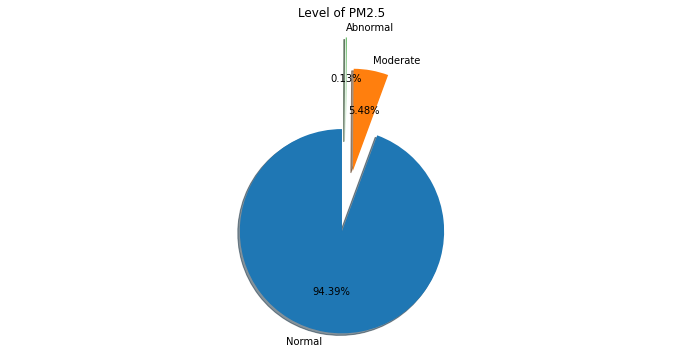

In [76]:

explode = (0.2, 0.4, 0.7)

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(freq,
       explode=explode,
       labels=group_name,
       autopct='%1.2f%%',
       shadow=True,
       startangle=90)
ax.axis('equal') 
ax.set_title('Level of PM2.5')


plt.show()